# Linear model for classification
In regression, we saw that the target to be predicted was a continuous
variable. In classification, this target will be discrete (e.g. categorical).

We will go back to our penguin dataset. However, this time we will try to
predict the penguin species using the culmen information. We will also
simplify our classification problem by selecting only 2 of the penguin
species to solve a binary classification problem.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

We can quickly start by visualizing the feature distribution by class:

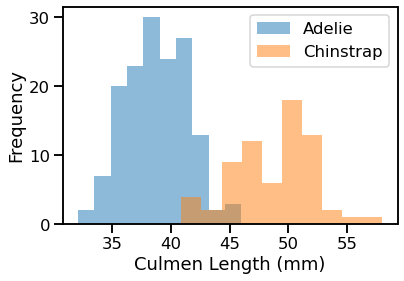

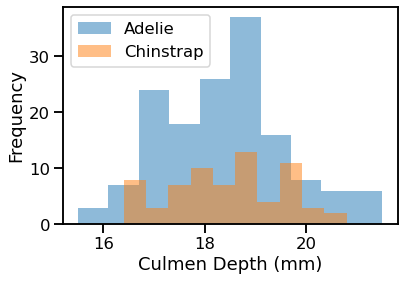

In [2]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

We can observe that we have quite a simple problem. When the culmen
length increases, the probability that the penguin is a Chinstrap is closer
to 1. However, the culmen depth is not helpful for predicting the penguin
species.

For model fitting, we will separate the target from the data and
we will create a training and a testing set.

In [3]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]


The linear regression that we previously saw will predict a continuous
output. When the target is a binary outcome, one can use the logistic
function to model the probability. This model is known as logistic
regression.

Scikit-learn provides the class `LogisticRegression` which implements this
algorithm.

In [4]:
import sklearn
sklearn.set_config(display="diagram")

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 1.000



Since we are dealing with a classification problem containing only 2
features, it is then possible to observe the decision function boundary.
The boundary is the rule used by our predictive model to affect a class label
given the feature values of the sample.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Here, we will use the class <tt class="docutils literal">DecisionBoundaryDisplay</tt>. We provide this class
to allow making plots of the decision function boundary in a 2 dimensional
space. The implementation can be found <a class="reference external" href="https://github.com/INRIA/scikit-learn-mooc/blob/main/python_scripts/helpers/plotting.py">here</a>.
This class is intended to be part of the <tt class="docutils literal"><span class="pre">scikit-learn</span></tt> package in the future
as it is proposed in the following <a class="reference external" href="https://github.com/scikit-learn/scikit-learn/pull/16061">Pull-Request</a>.</p>
</div>

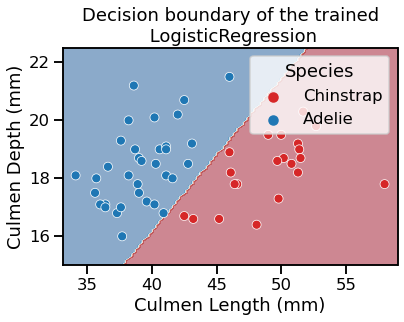

In [6]:
import seaborn as sns
from helpers.plotting import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

Thus, we see that our decision function is represented by a line separating
the 2 classes. We should also note that we did not impose any regularization
by setting the parameter `penalty` to `'none'`.

Since the line is oblique, it means that we used a combination of both
features:

In [7]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

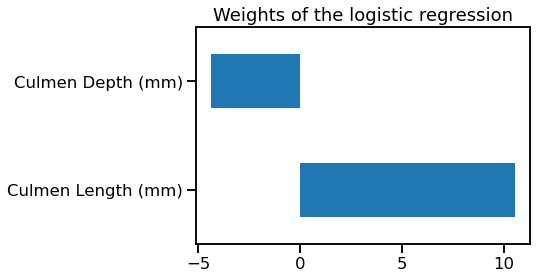

In [8]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

Indeed, both coefficients are non-null.